In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
df = pd.read_csv('/content/df_arabica_clean.csv')

In [4]:
# Check for missing values
df.isnull().sum()



,0
ID,0
Country of Origin,0
Lot Number,1
Altitude,1
Region,2
Number of Bags,0
Bag Weight,0
In-Country Partner,0
Harvest Year,0
Grading Date,0


In [6]:
print(df['Altitude'].dtype)




object


In [7]:
print(df['Altitude'].head())

0    1700-1930
1         1200
2         1300
3         1900
4    1850-2100
Name: Altitude, dtype: object


In [8]:
# Convert 'Altitude' column to numeric, forcing errors to NaN
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')


In [9]:
# Fill NaN values in the 'Altitude' column with the mean altitude
df['Altitude'] = df['Altitude'].fillna(df['Altitude'].mean())


In [10]:
# Check data type of 'Altitude' column
print(df['Altitude'].dtype)

float64


In [11]:
# Convert 'Altitude' column to numeric, setting invalid parsing to NaN
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

In [12]:
# Fill missing values in the 'Altitude' column with the mean altitude
df['Altitude'] = df['Altitude'].fillna(df['Altitude'].mean())

In [13]:
# Drop rows or columns with too many missing values
df = df.dropna(subset=['Cup_Score'])

KeyError: ['Cup_Score']

In [14]:

print(df.columns)


Index(['ID', 'Country of Origin', 'Lot Number', 'Altitude', 'Region',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Variety', 'Status', 'Processing Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color',
       'Category Two Defects', 'Expiration'],
      dtype='object')


In [15]:
# Drop rows where 'Total Cup Points' is missing
df = df.dropna(subset=['Total Cup Points'])


In [16]:
df = df.drop_duplicates()

In [17]:
# Detect outliers using z-score
from scipy import stats
df['z_score'] = np.abs(stats.zscore(df['Total Cup Points']))
df_outliers_removed = df[df['z_score'] < 3]

In [18]:
# Drop the z-score column after filtering
df_outliers_removed = df_outliers_removed.drop(columns=['z_score'])

In [19]:
# Descriptive statistics
df_outliers_removed.describe()


,ID,Altitude,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.0,204.000000,204.0,204.000000,204.00000,204.000000,204.000000,204.00000
mean,102.500000,1321.670437,154.784314,7.725147,7.749167,7.604461,7.692696,7.644657,7.648186,9.990196,10.0,10.0,7.681471,0.0,83.734559,10.72598,0.137255,0.642157,2.20098
std,59.033889,602.649689,243.817974,0.268072,0.263549,0.257099,0.243837,0.220674,0.238662,0.104060,0.0,0.0,0.287535,0.0,1.601767,1.25363,0.596198,1.500209,2.87229
min,1.000000,139.000000,1.000000,7.080000,7.080000,6.750000,7.000000,7.000000,7.000000,8.670000,10.0,10.0,7.000000,0.0,79.670000,0.00000,0.000000,0.000000,0.00000
25%,51.750000,1200.000000,1.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.07500,0.000000,0.000000,0.00000
50%,102.500000,1321.076923,15.000000,7.670000,7.750000,7.580000,7.710000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.790000,10.80000,0.000000,0.000000,1.00000
75%,153.250000,1450.000000,275.000000,7.920000,7.920000,7.750000,7.852500,7.750000,7.770000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.50000,0.000000,1.000000,3.00000
max,204.000000,5400.000000,2240.000000,8.500000,8.500000,8.250000,8.330000,8.250000,8.250000,10.000000,10.0,10.0,8.580000,0.0,87.580000,13.50000,5.000000,10.000000,16.00000


In [21]:
# Select only numeric columns
numeric_df = df_outliers_removed.select_dtypes(include=[np.number])

In [22]:
# Compute the correlation matrix on the numeric columns
corr_matrix = numeric_df.corr()

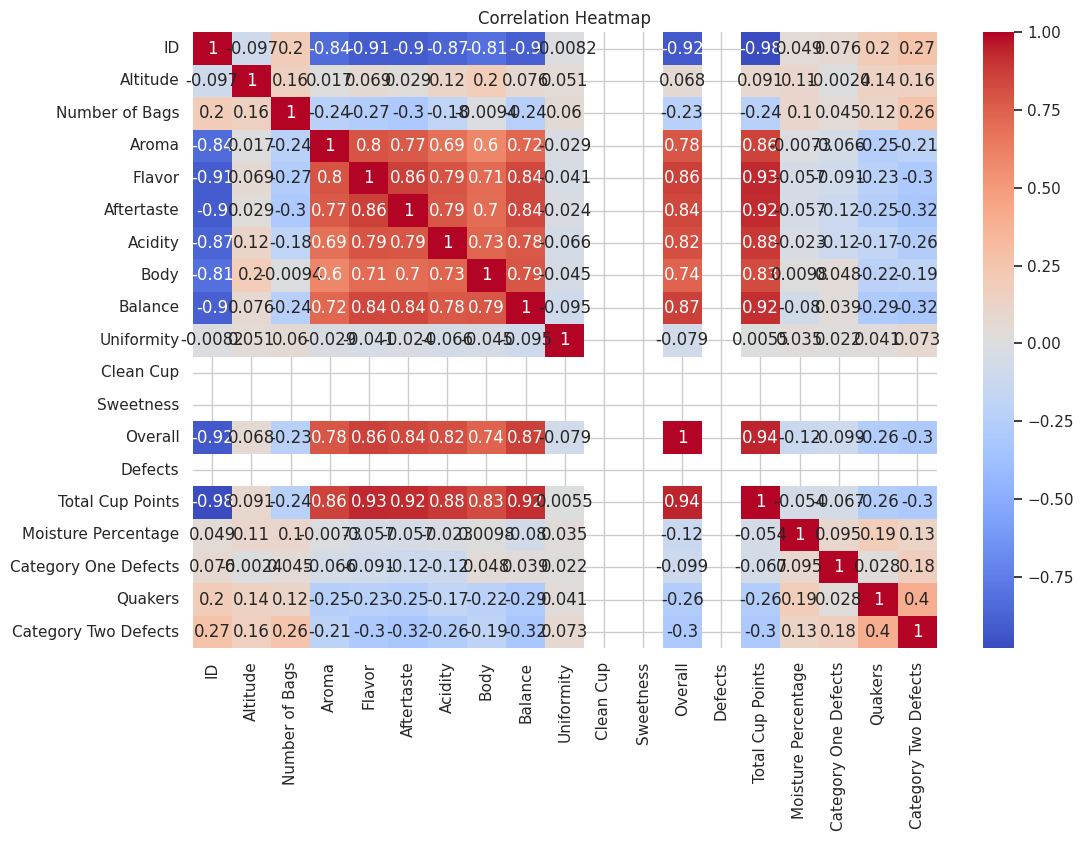

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

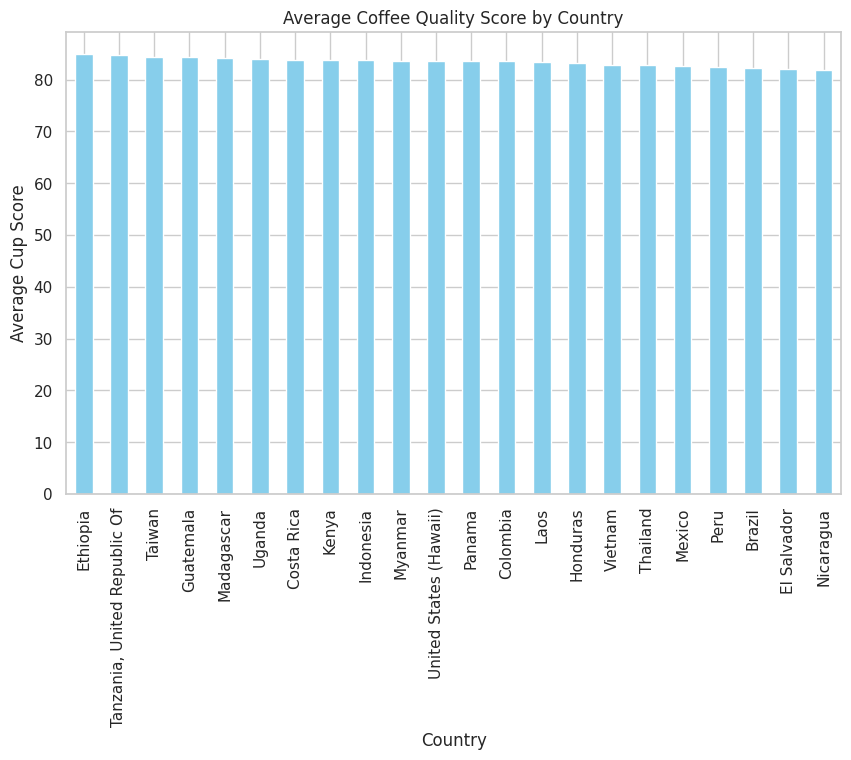

In [25]:
# Group by 'Country_of_Origin' and visualize average 'Cup_Score'
country_score = df_outliers_removed.groupby('Country of Origin')['Total Cup Points'].mean().sort_values(ascending=False)
country_score.plot(kind='bar', color='skyblue')
plt.title('Average Coffee Quality Score by Country')
plt.ylabel('Average Cup Score')
plt.xlabel('Country')
plt.show()


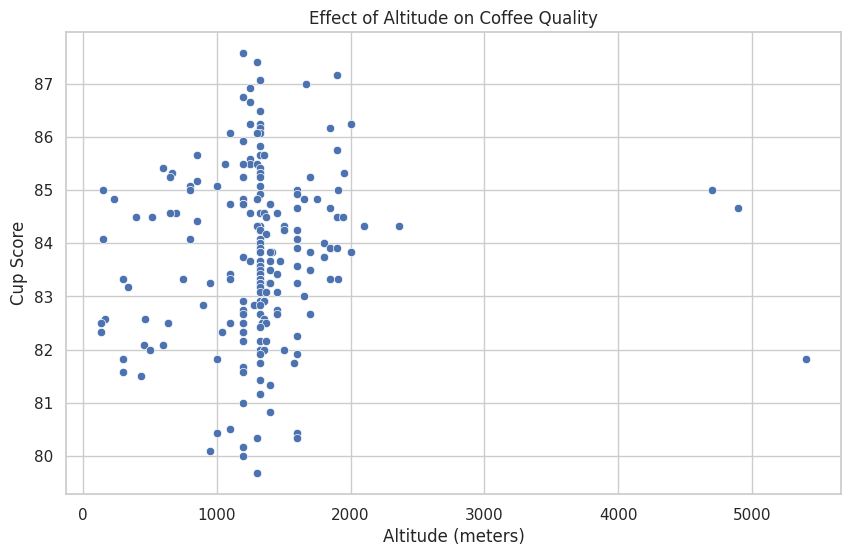

In [26]:
# Scatter plot of 'Altitude' vs. 'Cup_Score'
sns.scatterplot(x='Altitude', y='Total Cup Points', data=df_outliers_removed)
plt.title('Effect of Altitude on Coffee Quality')
plt.xlabel('Altitude (meters)')
plt.ylabel('Cup Score')
plt.show()


In [27]:
# Export cleaned data to CSV
df_outliers_removed.to_csv('cleaned_coffee_quality_data.csv', index=False)

In [28]:
# Download the file to your local machine
files.download('cleaned_coffee_quality_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>